In [1]:
import tensorflow as tf

In [5]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist  

In [11]:
(X_train, y_train) = (X_train_full[:-5000], y_train_full[:-5000])

In [13]:
(X_valid, y_valid) = (X_train_full[-5000:], y_train_full[-5000:])

In [17]:
X_train.shape

(55000, 28, 28)

In [19]:
X_train.dtype

dtype('uint8')

In [25]:
X_train, X_test, X_valid = X_train/255., X_test/255., X_valid/255.

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [30]:
class_names[y_train[0]]

'Ankle Boot'

In [32]:
tf.random.set_seed(42)

In [34]:
model=tf.keras.Sequential()

In [38]:
model.add(tf.keras.layers.Input(shape=[28,28]))

In [40]:
model.add(tf.keras.layers.Flatten())

In [46]:
model.add(tf.keras.layers.Dense(300, activation="relu"))

In [48]:
model.add(tf.keras.layers.Dense(100, activation="relu"))

In [50]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [64]:
hidden1=model.layers[1]
weights1, biases1 = hidden1.get_weights()

In [66]:
weights1

array([[-0.03606411,  0.02352593, -0.00259662, ..., -0.01989948,
         0.07003149, -0.03622343],
       [ 0.03513315,  0.0009852 , -0.06129901, ..., -0.00278701,
        -0.02658718, -0.03901072],
       [ 0.00375225, -0.04663088, -0.00662307, ..., -0.00548299,
         0.01187333, -0.0532277 ],
       ...,
       [ 0.04687542, -0.05298893, -0.07287812, ..., -0.04732387,
         0.04755282, -0.02587853],
       [ 0.06855628, -0.04868129, -0.07079713, ...,  0.0370749 ,
         0.00072241,  0.0650443 ],
       [-0.0255197 ,  0.06237903, -0.06036094, ..., -0.02231188,
        -0.01954882,  0.01472606]], dtype=float32)

In [68]:
biases1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [82]:
hidden2=model.layers[2]
weights2, biases2 = hidden2.get_weights()

In [84]:
weights2

array([[ 0.01662154,  0.07767076,  0.03814263, ...,  0.07136603,
        -0.06541053,  0.07248927],
       [-0.05035144,  0.08920871, -0.0039596 , ..., -0.10177829,
        -0.02187851,  0.00199481],
       [-0.04048881,  0.05773503, -0.01161204, ..., -0.04834609,
        -0.09489032,  0.08991262],
       ...,
       [-0.08582158, -0.10006185, -0.11971863, ...,  0.09239446,
         0.05345557, -0.0414596 ],
       [-0.01395474, -0.10991431, -0.09091964, ...,  0.09271852,
        -0.04606546,  0.09510208],
       [-0.03457189, -0.05066855,  0.0395957 , ...,  0.09118853,
        -0.09455901, -0.01809049]], dtype=float32)

In [86]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [88]:
hidden3=model.layers[3]
weights3, biases3 = hidden3.get_weights()

In [90]:
weights3

array([[-0.15886164,  0.12166014,  0.20025763,  0.07746646, -0.16138901,
        -0.07955827, -0.20191374,  0.12984264, -0.20582716,  0.15427929],
       [ 0.15929037,  0.22128135,  0.01378623,  0.03702179,  0.16271815,
        -0.16455701, -0.04593067,  0.15457335,  0.19801238, -0.00656192],
       [ 0.04722774,  0.10796213,  0.09580362,  0.21307647,  0.08293933,
         0.14243856, -0.05558637, -0.05772208, -0.16763777,  0.21534643],
       [-0.12896147,  0.09395328,  0.0906989 ,  0.09843895,  0.0938108 ,
        -0.06013958, -0.21835546,  0.13880119,  0.03920779,  0.06112739],
       [-0.17085817, -0.00168885, -0.13878545,  0.19615498,  0.16874   ,
         0.16539577, -0.02535601, -0.04183076,  0.03690669, -0.06429155],
       [ 0.13107625,  0.22619113, -0.11422313,  0.0480881 , -0.20760828,
         0.17577338,  0.05489734, -0.16637121, -0.00392552, -0.03756414],
       [-0.00080851,  0.10391232, -0.17680714, -0.07037288, -0.22611283,
         0.02584574, -0.05673075, -0.18924032

In [92]:
biases3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics = ["accuracy"]
)

In [98]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6863 - loss: 0.9948 - val_accuracy: 0.8258 - val_loss: 0.5050
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8242 - loss: 0.5041 - val_accuracy: 0.8398 - val_loss: 0.4528
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8423 - loss: 0.4521 - val_accuracy: 0.8484 - val_loss: 0.4279
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8525 - loss: 0.4223 - val_accuracy: 0.8522 - val_loss: 0.4126
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8601 - loss: 0.4005 - val_accuracy: 0.8548 - val_loss: 0.4026
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8662 - loss: 0.3832 - val_accuracy: 0.8556 - val_loss: 0.3935
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8705 - loss: 0.3686 - val_accuracy: 0.8570 - val_loss: 0.3869
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8747 - l

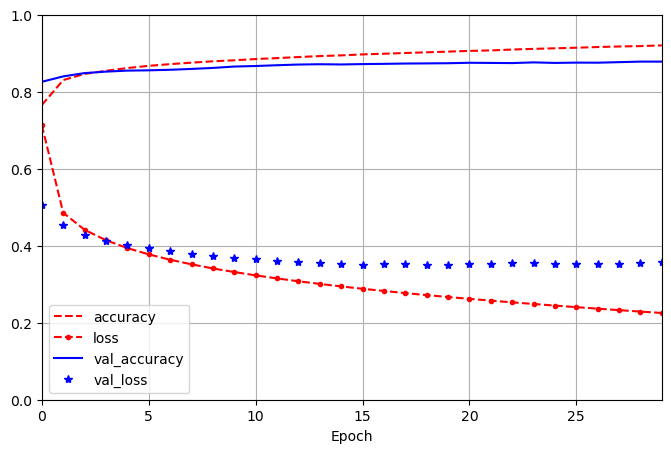

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True,
    xlabel="Epoch", style= ["r--","r--.", "b-", "b*"]
)
plt.show()

In [112]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8764 - loss: 0.3654


[0.36595484614372253, 0.8752999901771545]

In [114]:
X_new=X_test[:3]
y_proba= model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [120]:
y_proba

array([[3.1678406e-05, 2.9751316e-06, 2.0998556e-05, 1.9928939e-06,
        1.3662339e-05, 2.2181572e-01, 1.2081478e-05, 1.1799783e-02,
        1.3711139e-04, 7.6616395e-01],
       [3.5725413e-06, 9.2265688e-09, 9.9708802e-01, 2.0342015e-09,
        2.8732298e-03, 3.7455300e-10, 3.5150129e-05, 6.3558497e-10,
        1.2765114e-08, 8.3980375e-12],
       [2.3991076e-06, 9.9999690e-01, 2.6893173e-07, 3.9131200e-07,
        2.3391268e-08, 7.7054707e-10, 1.9370741e-09, 1.4144032e-10,
        1.2535055e-10, 1.6998781e-11]], dtype=float32)

In [124]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.01, 0.  , 0.77],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [126]:
import numpy as np
y_pred=y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [128]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [134]:
np.array(class_names)[y_test[:3]]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')